In [1]:
#impoting necessary libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set(style = 'white')
colors = sns.color_palette()
sns.set_palette(colors)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [2]:
warnings.filterwarnings("ignore")

In [3]:
tel_cust = pd.read_csv(r"../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
# Dataframe is dominated by categorical columns
tel_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
tel_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
tel_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
tel_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# TotalCharges has object data type. so we should convert it into numeric
tel_cust['TotalCharges'] = pd.to_numeric(tel_cust.TotalCharges,errors='coerce')
tel_cust = tel_cust.dropna()
tel_copy = tel_cust.drop(columns='customerID').copy()
tel_copy['Churn'] = tel_copy['Churn'].replace({'Yes':1,'No':0})
tel_copy = pd.get_dummies(tel_copy)

<Axes: xlabel='Churn'>

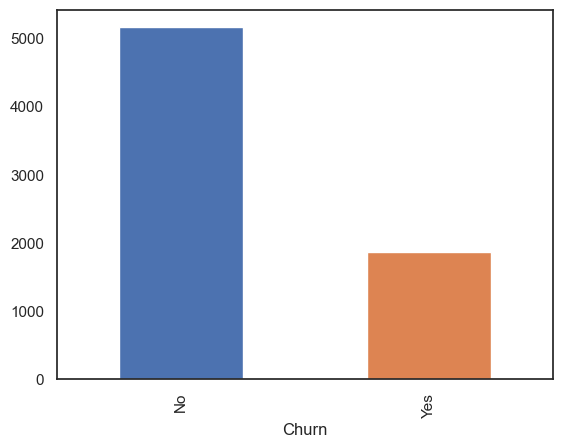

In [9]:
# as expected dataset is imbalanced . i.e Majority instances are not churned.
tel_cust['Churn'].value_counts().plot.bar(color=colors)

<Axes: >

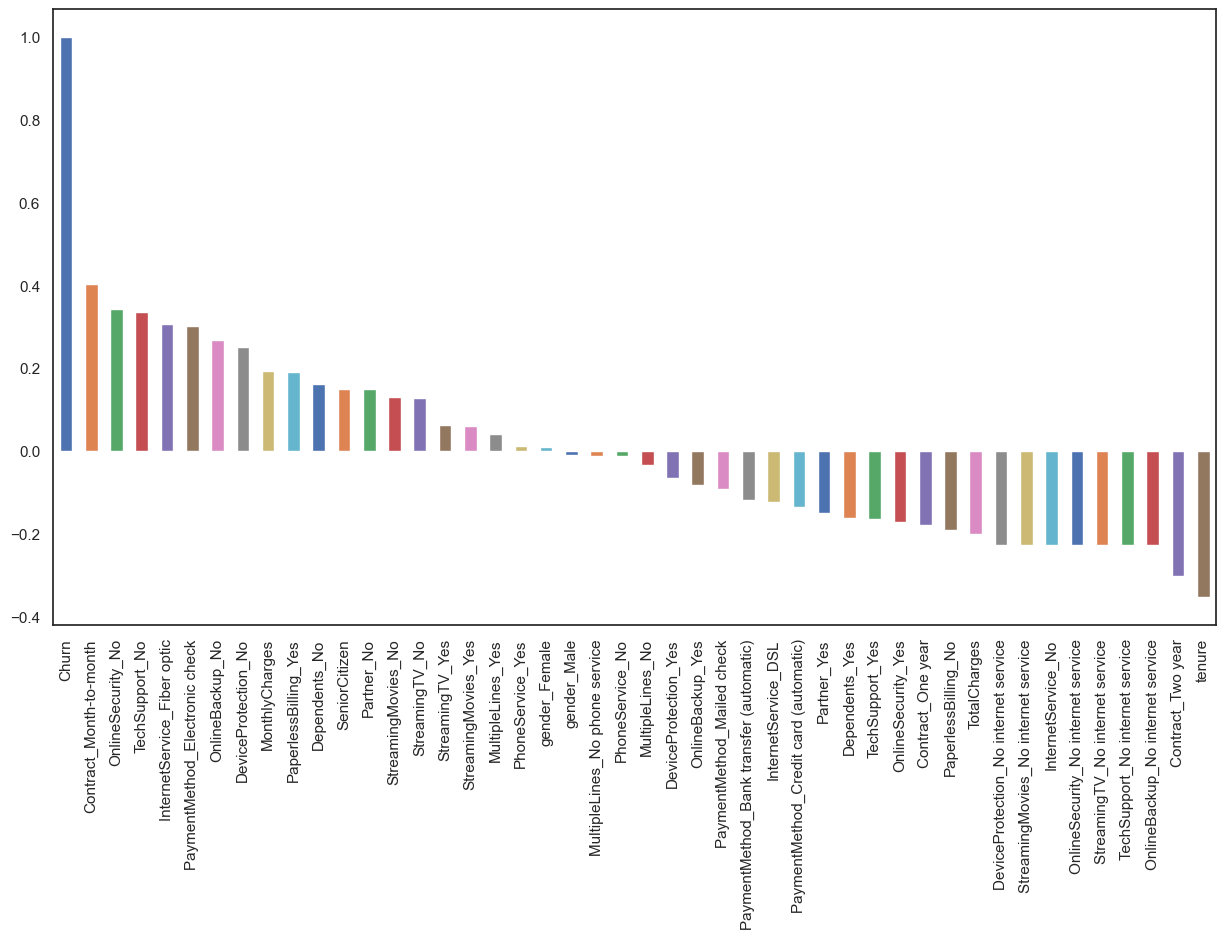

In [10]:
# Let's see which columns are important.
plt.figure(figsize=(15,8))
tel_copy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',color = colors)

from the above plot we can see that tenure , contract and charges are most important columns. It is the reflection of real world scenario

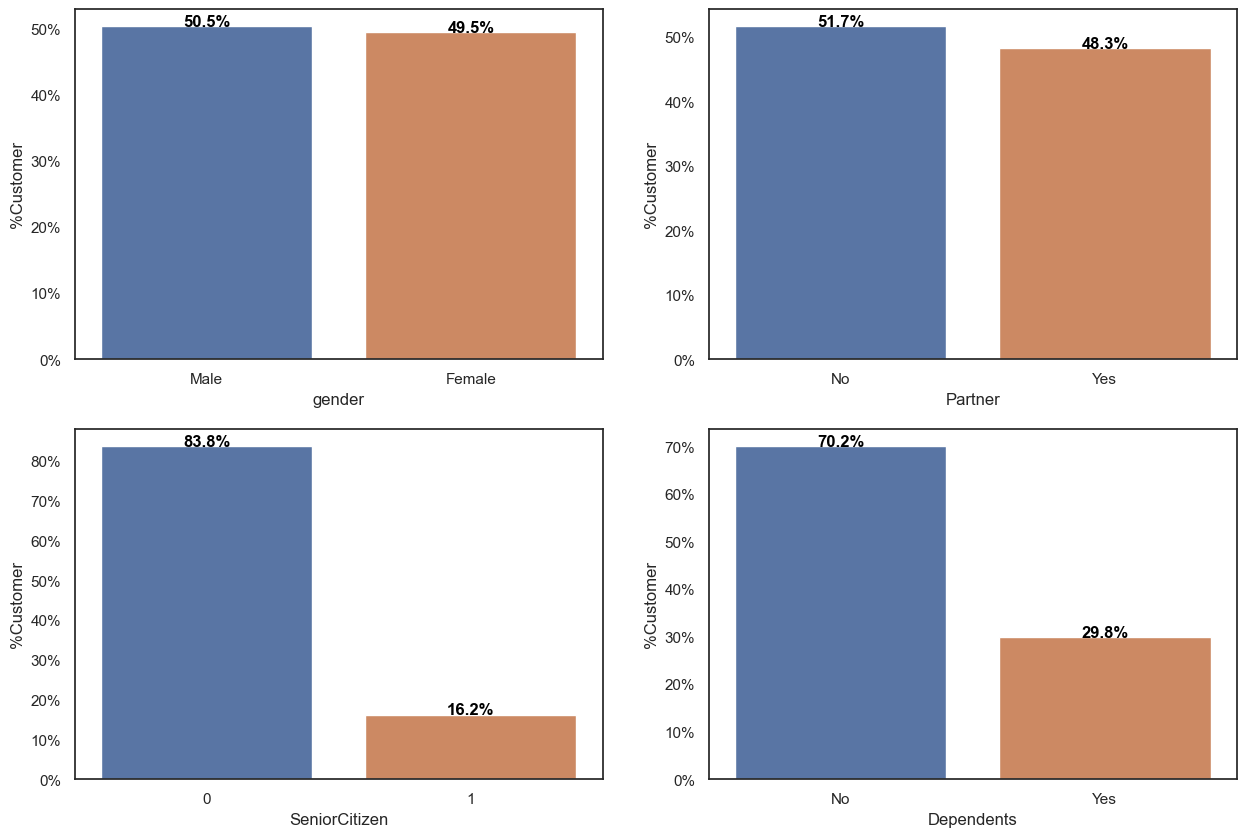

In [11]:
# Let's explore the distribution of some categorical columns.
cat_fets = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']  # List of categorical features to plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Creating a 2x2 subplot grid for the plots

# Looping through each categorical feature to plot its distribution
for i, item in enumerate(cat_fets):
    if i < 2:
        value_counts = tel_cust[item].value_counts(normalize=True) * 100  # Calculating the percentage of each category
        ax = sns.barplot(x=value_counts.index, y=value_counts.values, ax=axs[i, 0],palette=colors)  # Creating a barplot for the feature
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())  # Formatting y-axis to show percentages
        ax.set_ylabel('%Customer')  # Labeling the y-axis as % of Customers
        # Adding percentage labels on top of each bar
        for index, value in enumerate(value_counts.values):
            ax.text(index, value, f'{value:.1f}%', ha='center', color='black', weight='bold')
    else:
        value_counts = tel_cust[item].value_counts(normalize=True) * 100  # Calculating the percentage of each category
        ax = sns.barplot(x=value_counts.index, y=value_counts.values, ax=axs[i-2, 1],palette=colors)  # Creating a barplot for the feature
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())  # Formatting y-axis to show percentages
        ax.set_ylabel('%Customer')  # Labeling the y-axis as % of Customers
        # Adding percentage labels on top of each bar
        for index, value in enumerate(value_counts.values):
            ax.text(index, value, f'{value:.1f}%', ha='center', color='black', weight='bold')

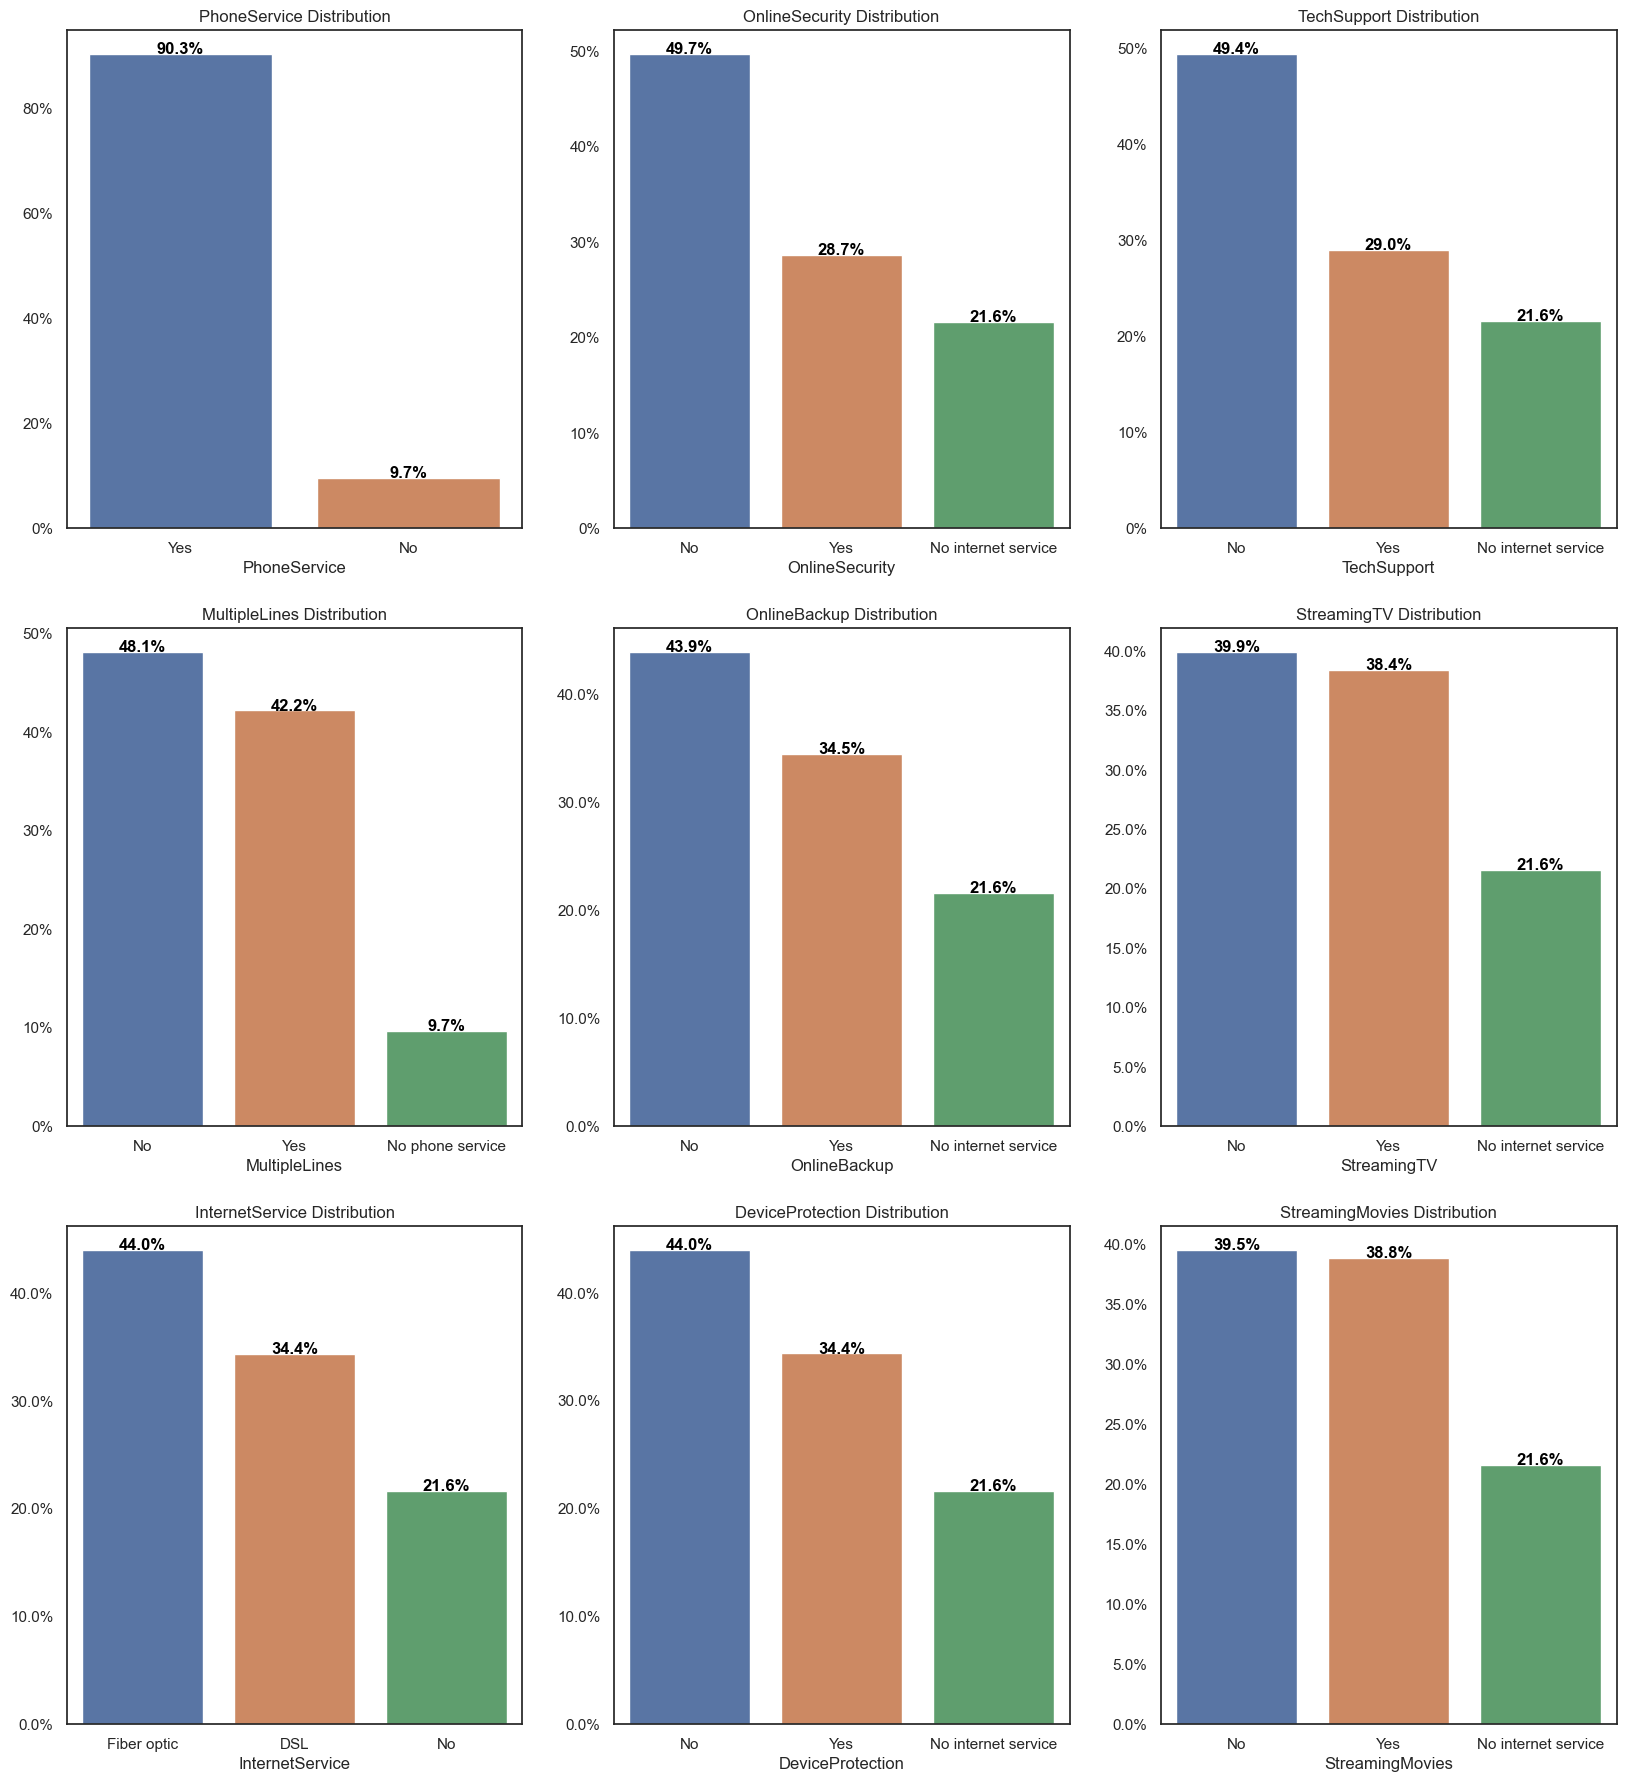

In [12]:
# List of service-related columns to explore
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Creating a 3x3 subplot grid to visualize the distribution of each service
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 22))

# Looping through each service to plot its distribution
for i, item in enumerate(services):
    if i < 3:
        value_counts = tel_cust[item].value_counts(normalize=True) * 100  # Calculating the percentage of each category
        ax = sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i, 0],palette=colors)  # Creating a barplot for the service
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())  # Formatting y-axis to show percentages
        ax.set_title(f'{item} Distribution')  # Setting the title of the plot to the service name
        # Adding percentage labels on top of each bar
        for index, value in enumerate(value_counts.values):
            ax.text(index, value, f'{value:.1f}%', ha='center', color='black', weight='bold')

    elif i >= 3 and i < 6:
        value_counts = tel_cust[item].value_counts(normalize=True) * 100  # Calculating the percentage of each category
        ax = sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i-3, 1],palette=colors)  # Creating a barplot for the service
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())  # Formatting y-axis to show percentages
        ax.set_title(f'{item} Distribution')  # Setting the title of the plot to the service name
        # Adding percentage labels on top of each bar
        for index, value in enumerate(value_counts.values):
            ax.text(index, value, f'{value:.1f}%', ha='center', color='black', weight='bold')

    elif i < 9:
        value_counts = tel_cust[item].value_counts(normalize=True) * 100  # Calculating the percentage of each category
        ax = sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i-6, 2],palette=colors)  # Creating a barplot for the service
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())  # Formatting y-axis to show percentages
        ax.set_title(f'{item} Distribution')  # Setting the title of the plot to the service name
        # Adding percentage labels on top of each bar
        for index, value in enumerate(value_counts.values):
            ax.text(index, value, f'{value:.1f}%', ha='center', color='black', weight='bold')

In [13]:
# Counting the occurrences of each payment method
value_count = tel_cust['PaymentMethod'].value_counts()

# Creating a donut chart to visualize the distribution of payment methods
fig = go.Figure(data=[go.Pie(labels=value_count.index, values=value_count.values, hole=0.4)])

# Adding a title to the chart
fig.update_layout(title='PaymentMethod Distribution')

# Displaying the chart
fig.show()

Automatic and non automatic payment methods are eqully prefrred.

<Axes: xlabel='Contract'>

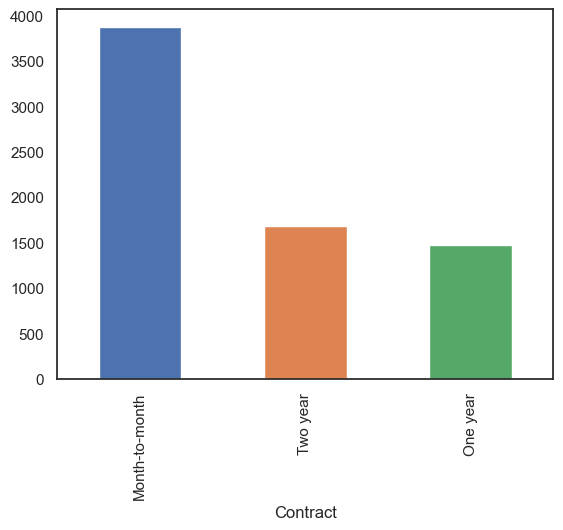

In [14]:
tel_cust['Contract'].value_counts().plot.bar(color=colors)

Half  of the contracts are monthly based.

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

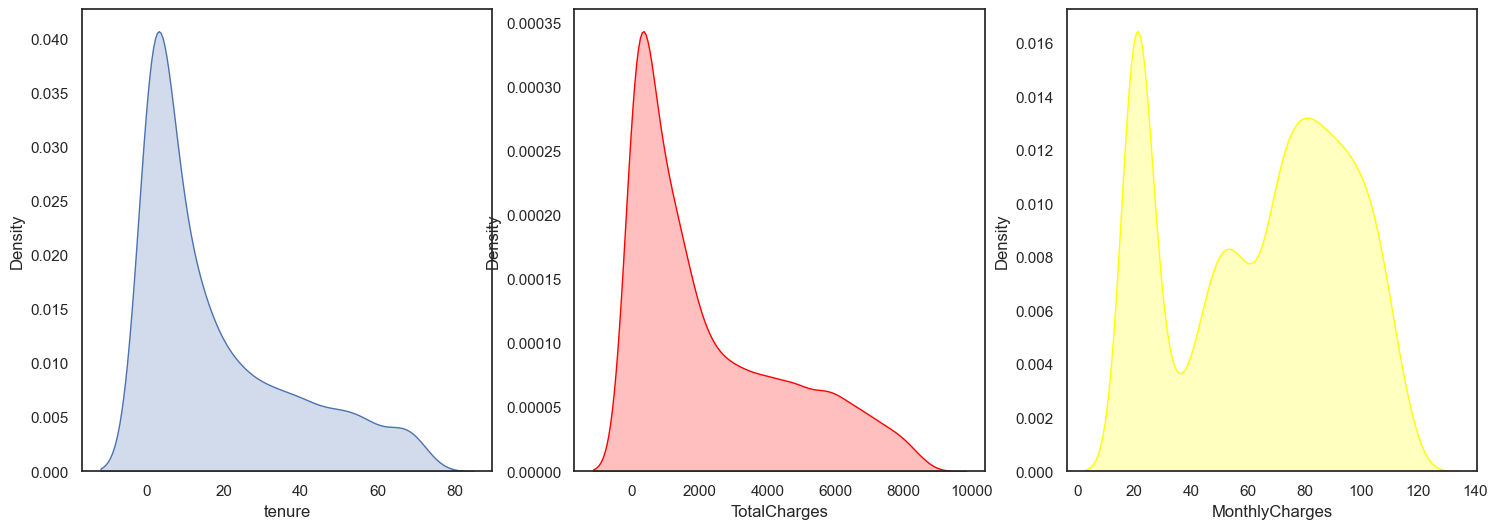

In [15]:
# Plotting distributions for tenure, TotalCharges, and MonthlyCharges
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Creating a 1x3 subplot grid

# Plotting the distribution of tenure for customers who churned
sns.kdeplot(tel_cust[tel_cust['Churn'] == 'Yes']['tenure'], fill=True, ax=axs[0])

# Plotting the distribution of TotalCharges for all customers
sns.kdeplot(tel_cust['TotalCharges'], fill=True, color='red', ax=axs[1])

# Plotting the distribution of MonthlyCharges for all customers
sns.kdeplot(tel_cust['MonthlyCharges'], fill=True, color='yellow', ax=axs[2])

Surprisingly Distribution of total charges and the tenure of customers who churned is exactly same

***Interactions of columns***

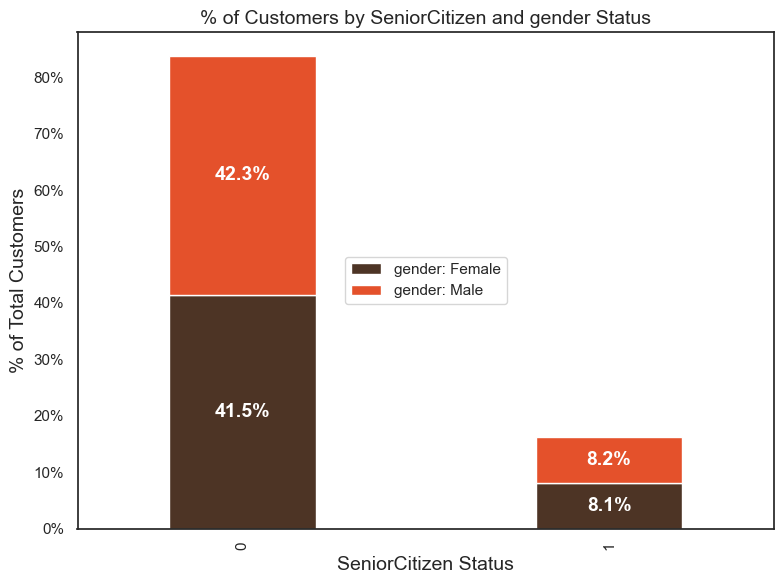

In [16]:
grouped = tel_cust.groupby(['SeniorCitizen', 'gender']).size().unstack()

# Calculate the percentage of the total dataset
percentage_df = grouped * 100 / len(tel_cust)

# Plot the stacked bar chart
color = ['#4D3425', '#E4512B']  # Custom colors for Partner No and Yes
ax = percentage_df.plot(kind='bar', stacked=True, color=color, figsize=(8, 6), width=0.4)

# Set the y-axis to percentage format
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of Total Customers', size=14)
ax.set_xlabel('SeniorCitizen Status', size=14)
ax.set_title('% of Customers by SeniorCitizen and gender Status', size=14)

# Adjust the legend to clearly indicate Partner status
ax.legend(['gender: Female', 'gender: Male'], loc='center')


# Adding percentage annotations inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', color='white', weight='bold', size=14)

plt.tight_layout() # Adjust layout to make room for legend
plt.show()

Gender distribution across seniority is equal.

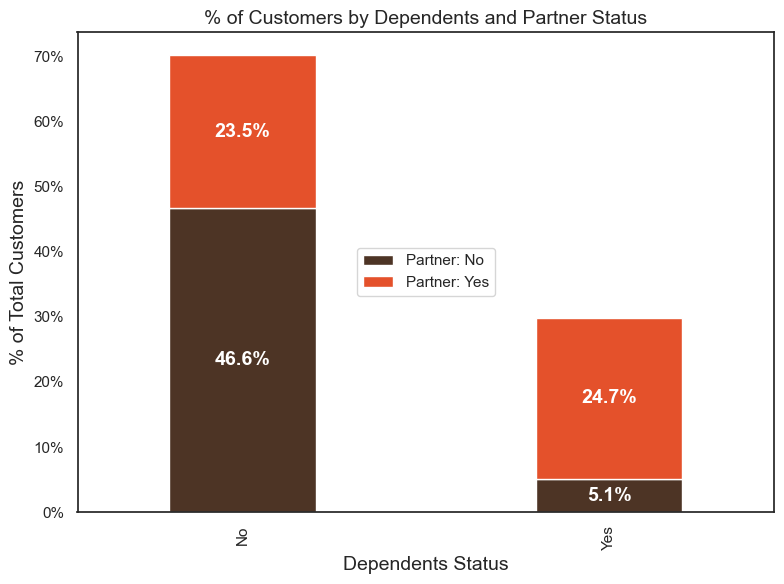

In [17]:
# Group by 'Dependents' and 'Partner', calculate counts
grouped = tel_cust.groupby(['Dependents', 'Partner']).size().unstack()

# Calculate the percentage of the total dataset
percentage_df = grouped * 100 / len(tel_cust)

# Plot the stacked bar chart
color = ['#4D3425', '#E4512B']  # Custom colors for Partner No and Yes
ax = percentage_df.plot(kind='bar', stacked=True, color=color, figsize=(8, 6), width=0.4)

# Set the y-axis to percentage format
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of Total Customers', size=14)
ax.set_xlabel('Dependents Status', size=14)
ax.set_title('% of Customers by Dependents and Partner Status', size=14)

# Adjust the legend to clearly indicate Partner status
ax.legend(['Partner: No', 'Partner: Yes'], loc='center')


# Adding percentage annotations inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', color='white', weight='bold', size=14)

plt.tight_layout() # Adjust layout to make room for legend
plt.show()

Most of the dependents has partner

Text(0.5, 0, 'Tenure (One year)')

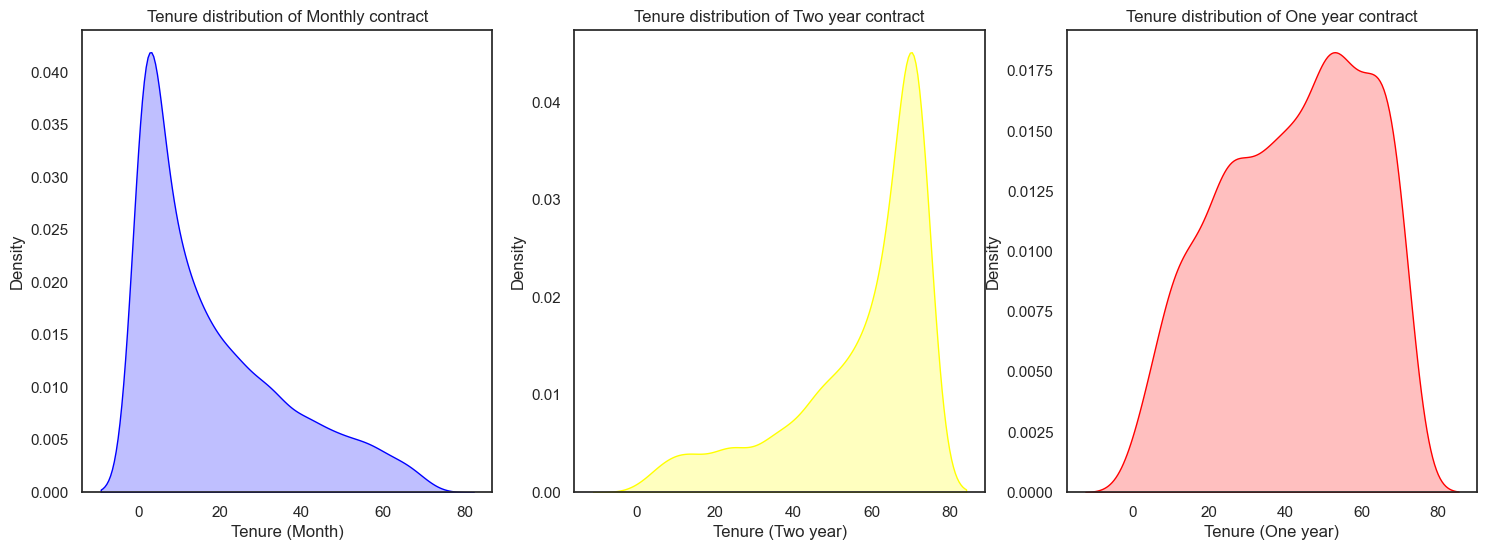

In [18]:
# Creating a 1x3 subplot grid to plot the distribution of tenure for different contract types
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting the tenure distribution for customers with a month-to-month contract
sns.kdeplot(tel_cust[tel_cust['Contract'] == 'Month-to-month']['tenure'], fill=True, ax=axs[0], color='blue')
axs[0].set_title('Tenure distribution of Monthly contract')  # Setting the title for the first subplot
axs[0].set_xlabel('Tenure (Month)')  # Labeling the x-axis as 'Tenure (Month)'

# Plotting the tenure distribution for customers with a two-year contract
sns.kdeplot(tel_cust[tel_cust['Contract'] == 'Two year']['tenure'], fill=True, ax=axs[1], color='yellow')
axs[1].set_title('Tenure distribution of Two year contract')  # Setting the title for the second subplot
axs[1].set_xlabel('Tenure (Two year)')  # Labeling the x-axis as 'Tenure (Two year)'

# Plotting the tenure distribution for customers with a one-year contract
sns.kdeplot(tel_cust[tel_cust['Contract'] == 'One year']['tenure'], fill=True, ax=axs[2], color='red')
axs[2].set_title('Tenure distribution of One year contract')  # Setting the title for the third subplot
axs[2].set_xlabel('Tenure (One year)')  # Labeling the x-axis as 'Tenure (One year)'

Tenure of monthly contracts is exact reflection of two year contracts.
i.e customers with long contracts doesn't churn.let us try to find the reason.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

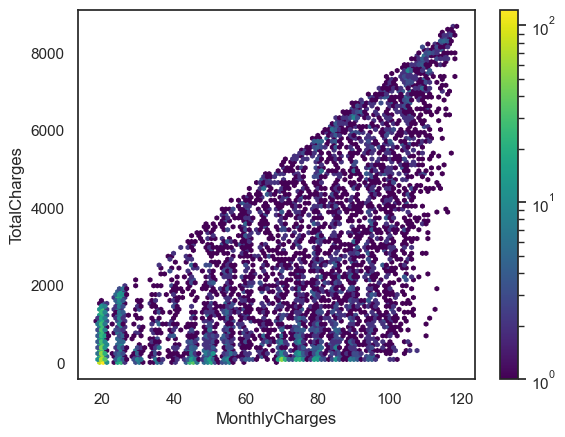

In [19]:
tel_cust.plot.hexbin(x='MonthlyCharges',y='TotalCharges',cmap='viridis',bins='log')

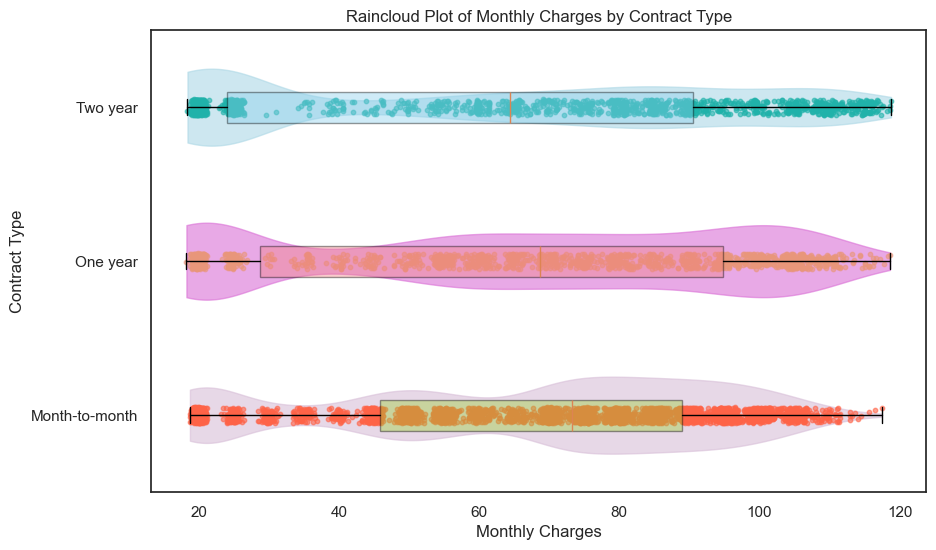

In [20]:

# Prepare data
data_x = tel_cust[['MonthlyCharges', 'Contract']]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each part of the raincloud plot
boxplots_colors = ['yellowgreen', 'lightcoral', 'skyblue']
violin_colors = ['thistle', 'orchid', 'lightblue']
scatter_colors = ['tomato', 'darksalmon', 'lightseagreen']

# Iterate over each contract type and plot
for i, contract_type in enumerate(data_x['Contract'].unique()):
    # Filter data for the current contract type
    charges = data_x[data_x['Contract'] == contract_type]['MonthlyCharges']

    # Boxplot
    bp = ax.boxplot(charges, positions=[i], widths=0.2, patch_artist=True, vert=False)
    for patch in bp['boxes']:
        patch.set_facecolor(boxplots_colors[i])
        patch.set_alpha(0.4)

    # Violin plot
    vp = ax.violinplot(charges, positions=[i], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)
    vp['bodies'][0].set_color(violin_colors[i])
    vp['bodies'][0].set_alpha(0.6)

    # Scatter plot with jitter
    jitter = np.random.uniform(-0.05, 0.05, size=len(charges))
    ax.scatter(charges, np.full_like(charges, i) + jitter, s=10, c=scatter_colors[i], alpha=0.6)

# Set y-axis labels to contract categories
ax.set_yticks(range(len(data_x['Contract'].unique())))
ax.set_yticklabels(data_x['Contract'].unique())

# Label the axes and set the title
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Contract Type')
ax.set_title('Raincloud Plot of Monthly Charges by Contract Type')

# Show the plot
plt.show()

As we can see from the above raincloud plot , the reason of higher churn rate among monthly users is **Charges.**

#### **Interaction with Target variable**

In [21]:
fig  = px.histogram(tel_cust,
                    x='Churn',
                    color='SeniorCitizen',
                    barmode='group',
                    title='Churn Analysis of SeniorCitizen',
                    histnorm='percent')
fig.update_yaxes(title_text='Percentage')
fig.show()

Surprisingly , SeniorCitizen has ***double churn rate***  .  At this stage of life, they tend to be more cautious with their finances and less willing to spend on non-essential services. This heightened awareness leads them to reconsider and often cancel services they might have kept in earlier years. As a result, their churn rate is notably higher compared to younger customers.

If you find this notebook helpful and inspiring, don’t forget to give it a thumbs up! 👍

In [22]:
fig = px.histogram(data_frame = tel_cust,
                    x = 'Churn',
                   color='PaymentMethod',
                  title='Impact of Paymentmethod w.r.t Churn',
                   histnorm='percent'
                  )
fig.show()

Customers who are using ***automatic payment method*** doesn't churn , As it isn't require much thinking.By removing the manual effort, customers are less likely to reconsider their commitment or explore alternatives

In [23]:
fig  = px.histogram(data_frame=tel_cust,
                    x='Churn',
                   color='InternetService',
                   title='Churn rate w.r,t to Internetservices',
                    barmode='group'
                   )
fig.show()

Customers are showing a clear preference **against fiber optic service**, which suggests there may be underlying ***issues*** with it. Whether it's reliability, speed, or customer support, something is causing dissatisfaction. This dissatisfaction points to potential serious problems that need to be addressed to improve the service. Resolving these issues could help reduce customer churn and increase satisfaction.